In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [50]:
plt.rcParams["figure.figsize"] = (17,20)


font = {'weight' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

In [30]:
path_torch = r"E:\Quellen\Studenten\Gajewski\results\Torch_MSE\MADDPG/"
path_tfagents = r"E:\Quellen\Studenten\Gajewski\results\Longrun Torch MSE\201120\MADDPG/"


In [31]:
def readPickle(datapath):
    objects = []
    with (open(datapath, "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
    return objects

In [32]:
datapath = os.path.join(path_torch, "agentList.pkl")
with open(datapath, 'rb') as f:
    agentList = pickle.load(f)

In [33]:
datapath = os.path.join(path_torch, "totalReturns.pkl")
objects = readPickle(datapath)
returns_torch = []
for obj in objects:
    returns_torch = returns_torch + obj


datapath = os.path.join(path_tfagents, "totalReturns.pkl")
objects = readPickle(datapath)
returns_tf = []
for obj in objects:
    returns_tf = returns_tf + obj
    
    

In [34]:
datapath_torch = os.path.join(path_torch, "loss.pkl")
objects = readPickle(datapath_torch)
loss_torch = []
for obj in objects:
    loss_torch = loss_torch + obj
    
    
datapath_tf = os.path.join(path_tfagents, "loss.pkl")
objects = readPickle(datapath_tf)
loss_tf = []
for obj in objects:
    loss_tf = loss_tf + obj

In [8]:
datapath = os.path.join(path, "LoadingBeforeOpting.pkl")
objects = []
with (open(datapath, "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
congestionStatus = pd.concat(objects, axis=0, ignore_index=False)

NameError: name 'path' is not defined

In [35]:
datapath_torch = os.path.join(path_torch, "Actions.pkl")
objects = readPickle(datapath_torch)
Actions_torch = []
for obj in objects:
    Actions_torch = Actions_torch + obj
    
datapath_tf = os.path.join(path_tfagents, "Actions.pkl")
objects = readPickle(datapath_tf)
Actions_tf = []
for obj in objects:
    Actions_tf = Actions_tf + obj

In [157]:
num_iterations = len(loss)
eval_interval = 250
eval_steps = 30
log_interval = 10
ret_steps = int(num_iterations/eval_interval)
loss_steps = len(loss)

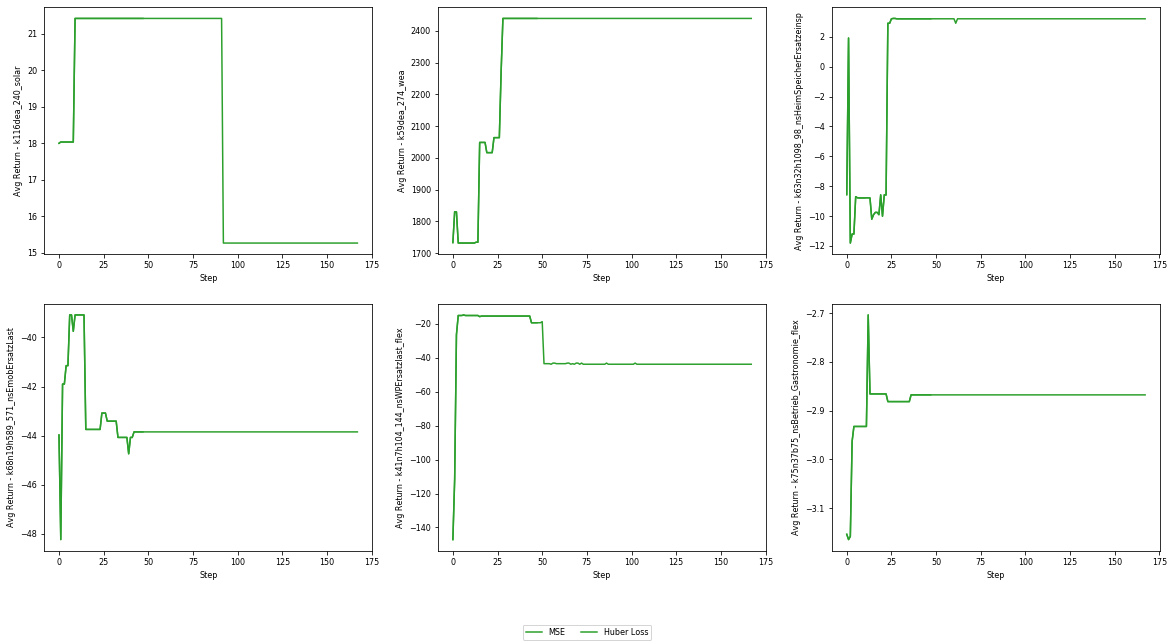

In [37]:
fig, axs = plt.subplots(2, 3)
i = 0
for j in range(2):
    for k in range(3):
        agent_returns_torch = [ret[i] for ret in returns_torch]
        agent_returns_tf = [ret[i] for ret in returns_tf]
        min_length = len(agent_returns_tf)*(len(agent_returns_tf) < len(agent_returns_torch)) + \
                        len(agent_returns_torch)*(len(agent_returns_tf) >= len(agent_returns_torch))
        axs[j, k].plot(range(min_length), agent_returns_torch[:min_length], 'tab:green', label = "MSE")
        axs[j, k].plot(range(min_length), agent_returns_tf[:min_length], 'tab:green', label = "Huber Loss")
        axs[j, k].set(ylabel='Avg Return - {}'.format(agentList[i]), xlabel='Step')
        i += 1
handles, labels = axs[j, k].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 2)
plt.savefig(path_torch + "Rewards.svg",  bbox_inches = 'tight', pad_inches = 0)

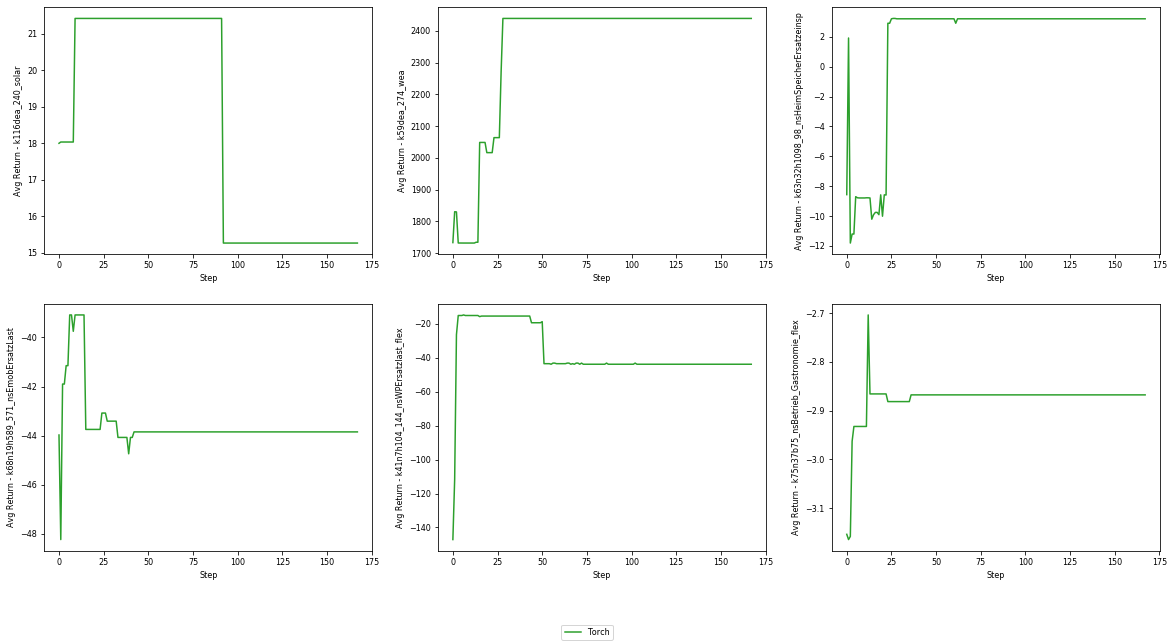

In [38]:
fig, axs = plt.subplots(2, 3)
i = 0
for j in range(2):
    for k in range(3):
        agent_returns_torch = [ret[i] for ret in returns_torch]
        axs[j, k].plot(range(len(agent_returns_torch)), agent_returns_torch, 'tab:green', label = "Torch")
        axs[j, k].set(ylabel='Avg Return - {}'.format(agentList[i]), xlabel='Step')
        i += 1
handles, labels = axs[j, k].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 2)
plt.savefig(path_torch + "RewardsV2.svg",  bbox_inches = 'tight', pad_inches = 0)

In [54]:
"""
fig, axs = plt.subplots(3, 2)
i = 0
for j in range(3):
    for k in range(2):
        agent_loss = [l[i] for l in loss]
        axs[j, k].plot(loss_steps, agent_loss, 'tab:red')
        axs[j, k].set(ylabel='Loss - {}'.format(agentList[i]), xlabel='Step')
        i += 1
"""

"\nfig, axs = plt.subplots(3, 2)\ni = 0\nfor j in range(3):\n    for k in range(2):\n        agent_loss = [l[i] for l in loss]\n        axs[j, k].plot(loss_steps, agent_loss, 'tab:red')\n        axs[j, k].set(ylabel='Loss - {}'.format(agentList[i]), xlabel='Step')\n        i += 1\n"

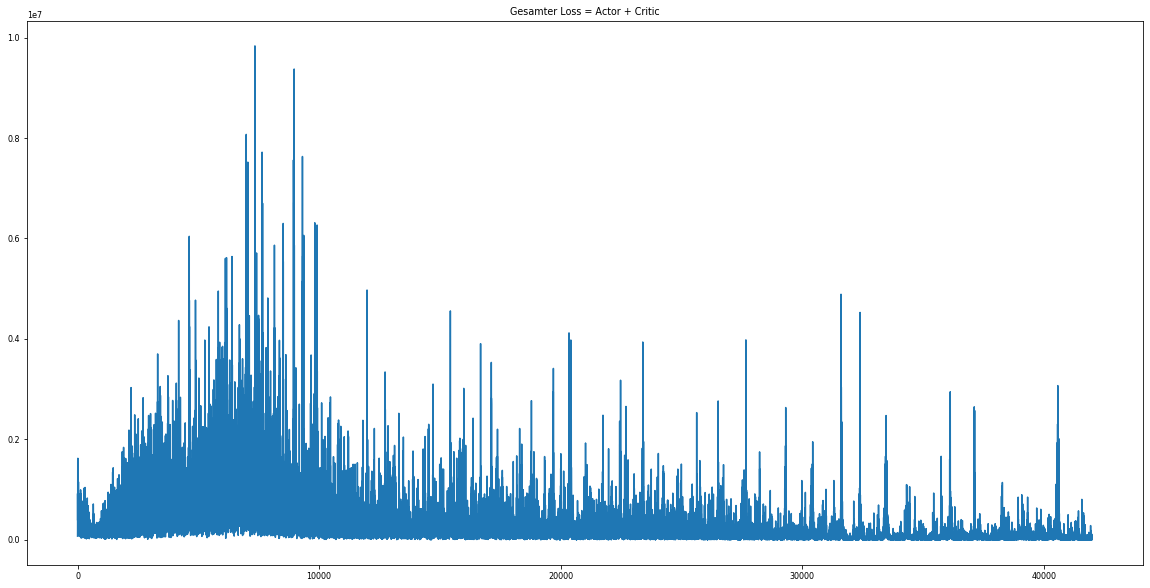

In [39]:
plt.plot(loss_torch, 'tab:blue', label = "Torch")
plt.title("Gesamter Loss = Actor + Critic")
plt.savefig(path_torch + "Loss_Torch.svg",  bbox_inches = 'tight', pad_inches = 0)

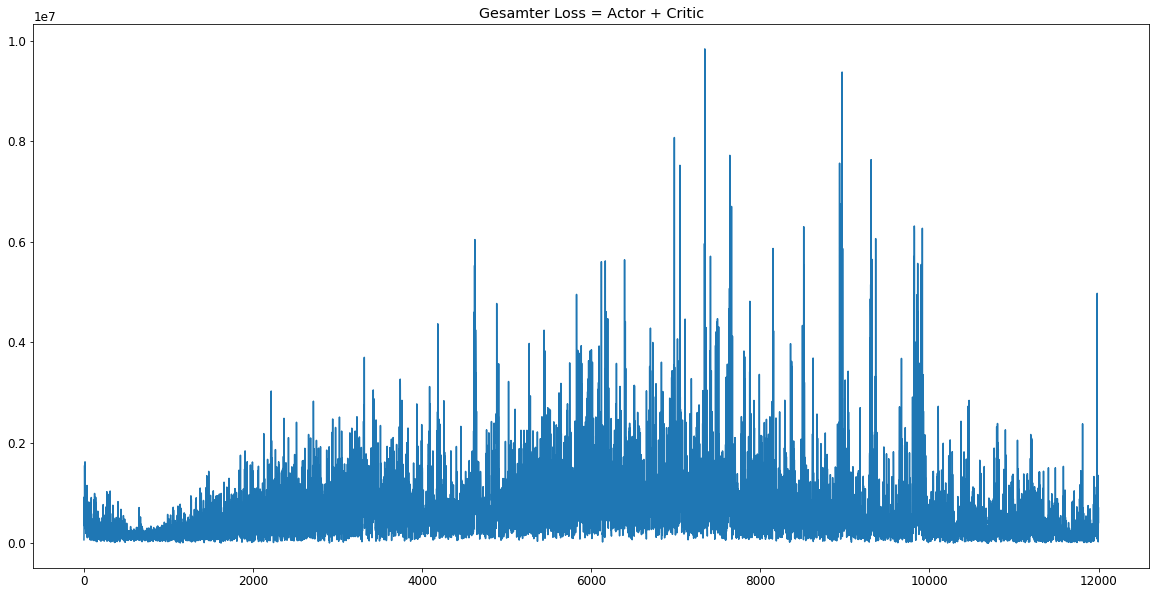

In [20]:
plt.plot(loss_tf, 'tab:blue', label = "Tensorflow")
plt.title("Gesamter Loss = Actor + Critic")
plt.savefig(path_tfagents + "Loss_TF.svg",  bbox_inches = 'tight', pad_inches = 0)

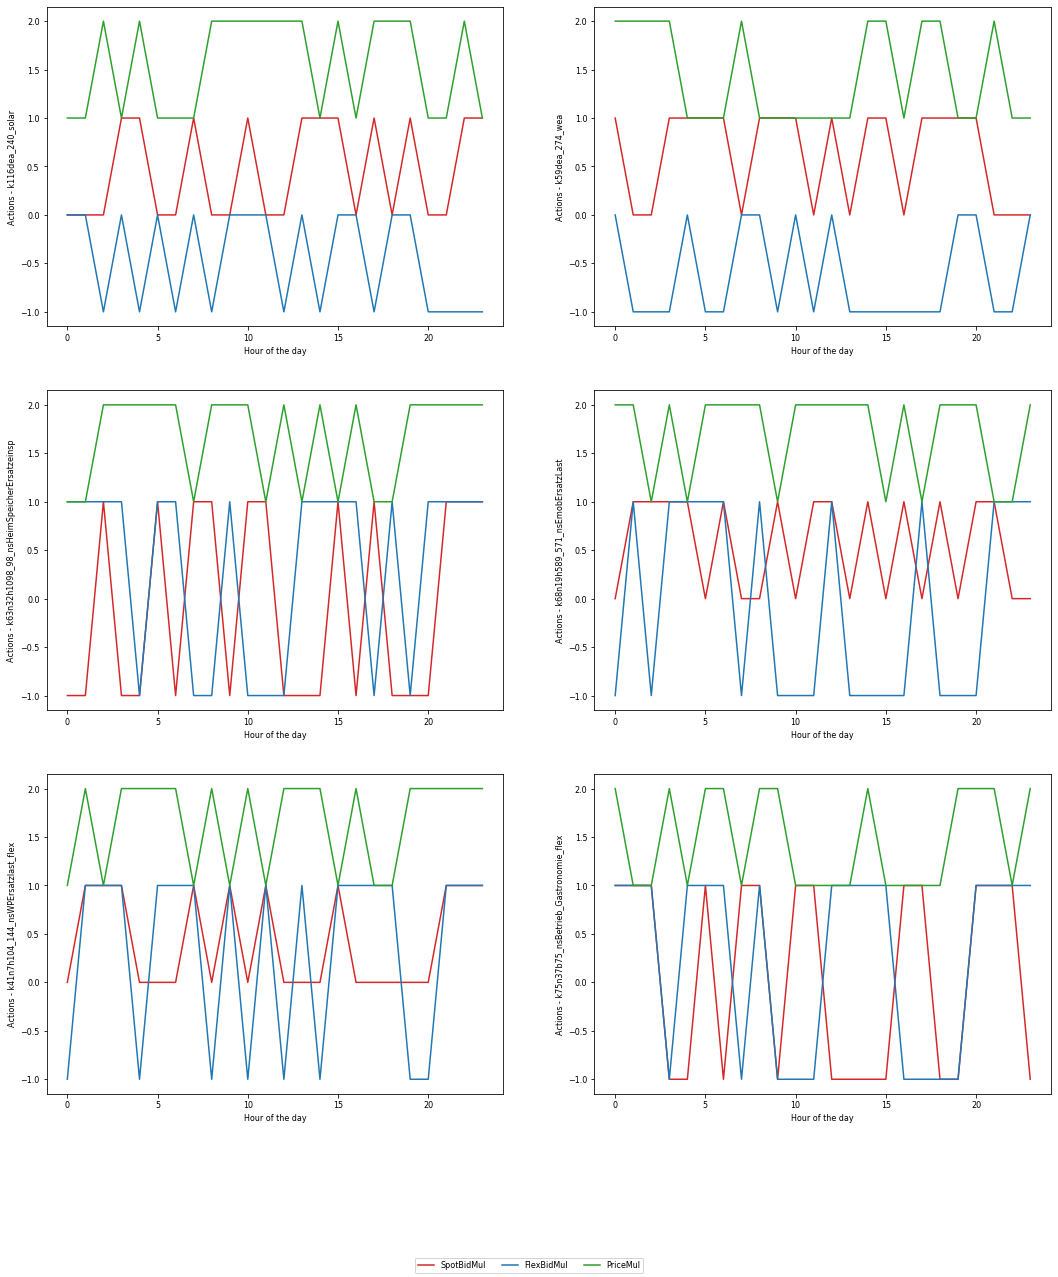

In [44]:
# Map the actions to the agents and plot them 
fig, axs = plt.subplots(3, 2)
i = 0
numAgents = len(agentList)
numSteps = range(24)
for j in range(3):
    for k in range(2):
        actions = Actions_torch[i::numAgents]
        sbm, fbm, pricem = [], [], []
        for action in actions:
            sbm.append(action[:24])
            fbm.append(action[24:48])
            pricem.append(action[48:])           

        axs[j, k].plot(numSteps,sbm[-1], 'tab:red', label = "SpotBidMul")
        axs[j, k].plot(numSteps, fbm[-1], 'tab:blue', label = "FlexBidMul")
        axs[j, k].plot(numSteps, 1 + pricem[-1], 'tab:green', label = "PriceMul")
        axs[j, k].set(ylabel='Actions - {}'.format(agentList[i]), xlabel='Hour of the day')
        i += 1
        
handles, labels = axs[j, k].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 3)
plt.savefig(path_torch + "Actions.svg",  bbox_inches = 'tight', pad_inches = 0)

   

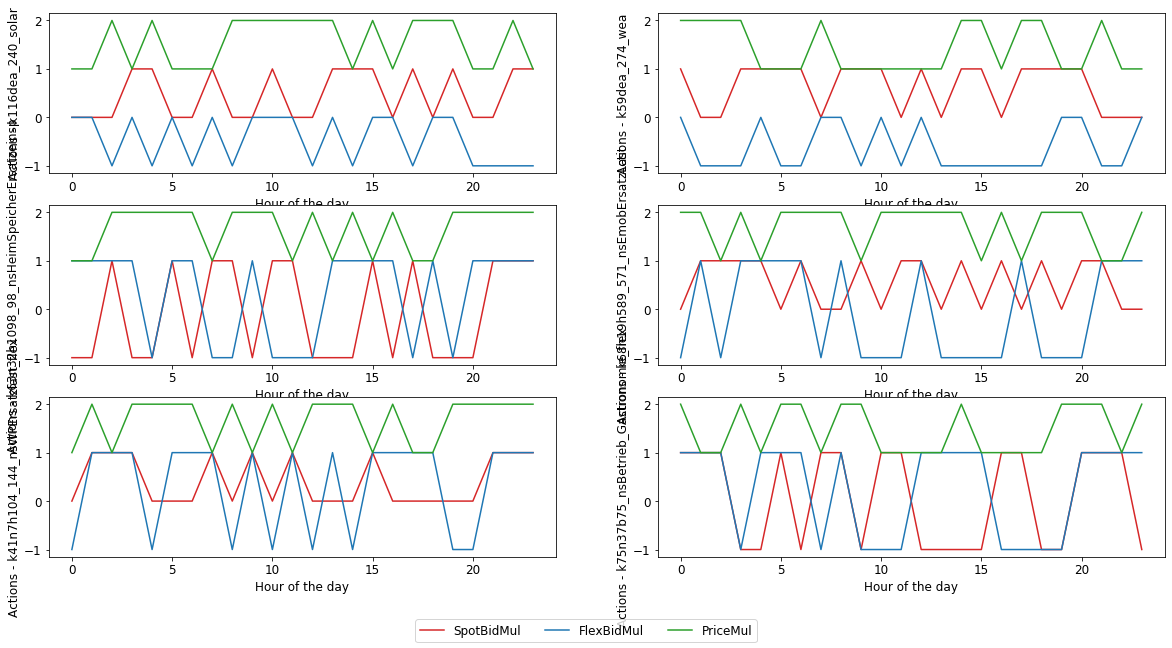

In [23]:
# Map the actions to the agents and plot them 
fig, axs = plt.subplots(3, 2)
i = 0
numAgents = len(agentList)
numSteps = range(24)
for j in range(3):
    for k in range(2):
        actions = Actions_torch[i::numAgents]
        sbm, fbm, pricem = [], [], []
        for action in actions:
            sbm.append(action[:24])
            fbm.append(action[24:48])
            pricem.append(action[48:])           

        axs[j, k].plot(numSteps,sbm[-1], 'tab:red', label = "SpotBidMul")
        axs[j, k].plot(numSteps, fbm[-1], 'tab:blue', label = "FlexBidMul")
        axs[j, k].plot(numSteps, 1 + pricem[-1], 'tab:green', label = "PriceMul")
        axs[j, k].set(ylabel='Actions - {}'.format(agentList[i]), xlabel='Hour of the day')
        i += 1
        
handles, labels = axs[j, k].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 3)
plt.savefig(path_torch + "Actions.svg",  bbox_inches = 'tight', pad_inches = 0)


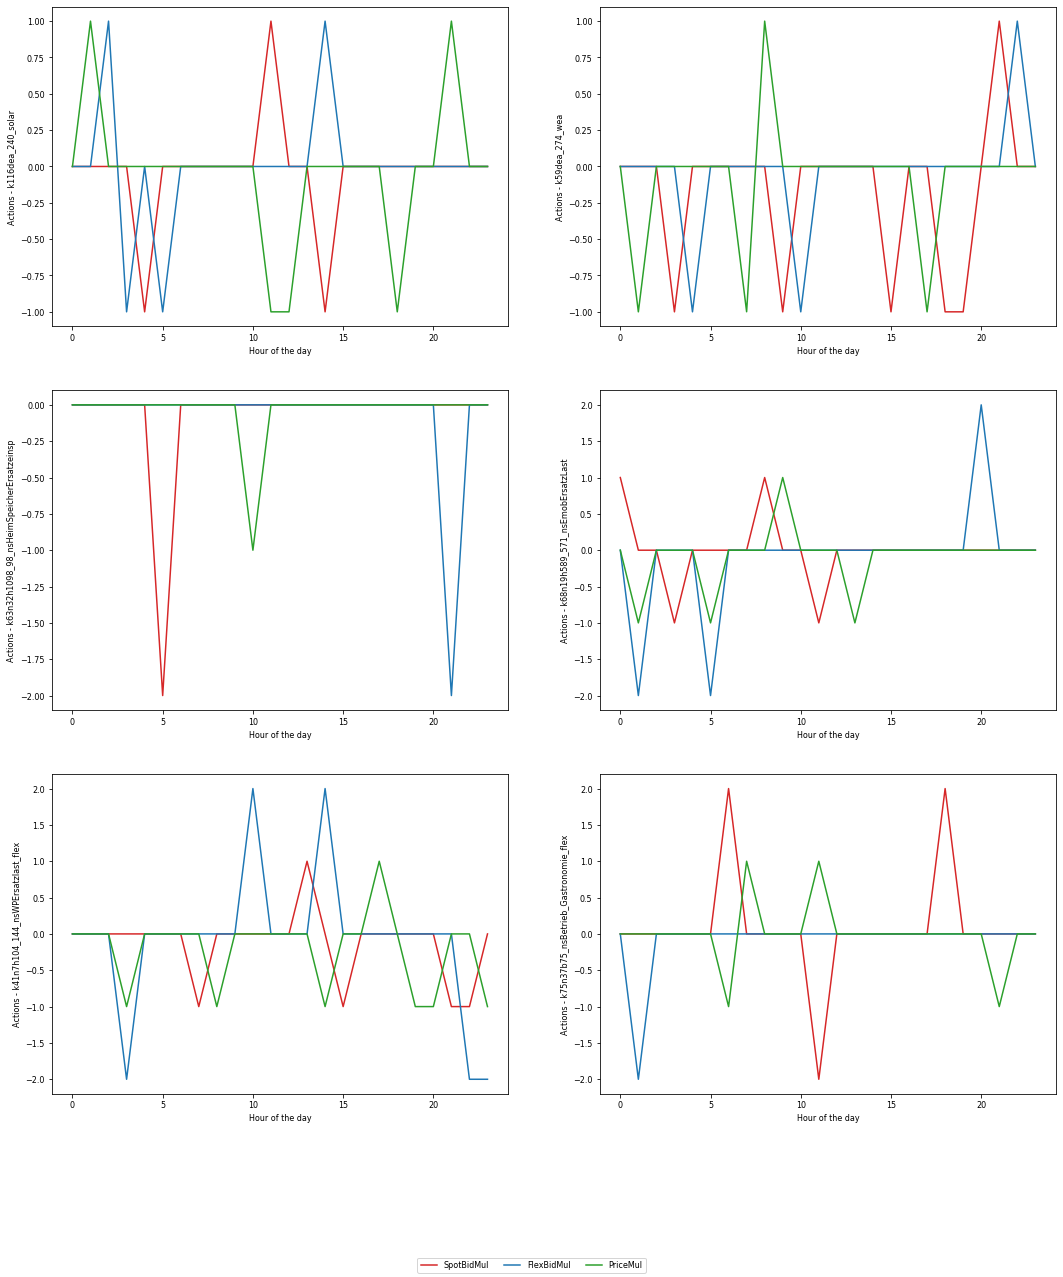

In [47]:
# Map the actions to the agents and plot them 
fig, axs = plt.subplots(3, 2)
i = 0
numAgents = len(agentList)
numSteps = range(24)
for j in range(3):
    for k in range(2):
        actions = Actions_torch[i::numAgents]
        sbm, fbm, pricem = [], [], []
        for action in actions:
            sbm.append(action[:24])
            fbm.append(action[24:48])
            pricem.append(action[48:])           

        axs[j, k].plot(numSteps, sbm[100] - sbm[-1], 'tab:red', label = "SpotBidMul")
        axs[j, k].plot(numSteps, fbm[100] - fbm[-1], 'tab:blue', label = "FlexBidMul")
        axs[j, k].plot(numSteps, pricem[100] - pricem[-1], 'tab:green', label = "PriceMul")
        axs[j, k].set(ylabel='Actions - {}'.format(agentList[i]), xlabel='Hour of the day')
        i += 1
        
handles, labels = axs[j, k].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 3)
plt.savefig(path_torch + "Actions_change.svg",  bbox_inches = 'tight', pad_inches = 0)


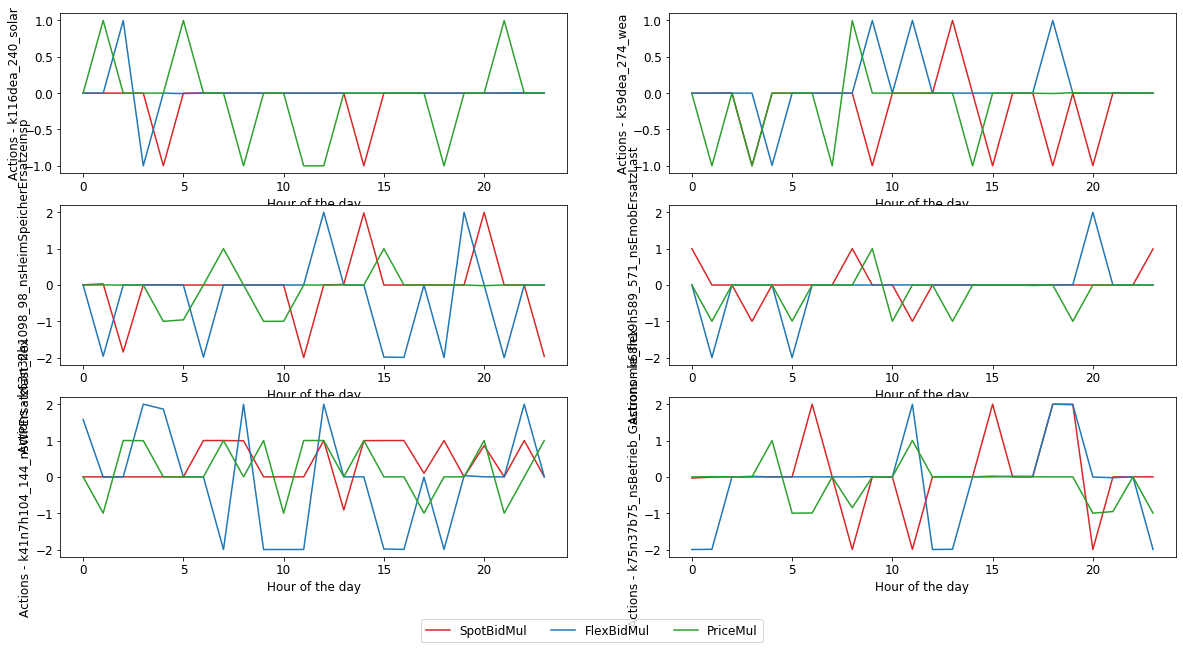

In [25]:
# Map the actions to the agents and plot them 
fig, axs = plt.subplots(3, 2)
i = 0
numAgents = len(agentList)
numSteps = range(24)
for j in range(3):
    for k in range(2):
        actions = Actions_tf[i::numAgents]
        sbm, fbm, pricem = [], [], []
        for action in actions:
            sbm.append(action[:24])
            fbm.append(action[24:48])
            pricem.append(action[48:])           

        axs[j, k].plot(numSteps, sbm[0] - sbm[-1], 'tab:red', label = "SpotBidMul")
        axs[j, k].plot(numSteps, fbm[0] - fbm[-1], 'tab:blue', label = "FlexBidMul")
        axs[j, k].plot(numSteps, pricem[0] - pricem[-1], 'tab:green', label = "PriceMul")
        axs[j, k].set(ylabel='Actions - {}'.format(agentList[i]), xlabel='Hour of the day')
        i += 1
        
handles, labels = axs[j, k].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 3)
plt.savefig(path_tfagents + "Actions_change.svg",  bbox_inches = 'tight', pad_inches = 0)


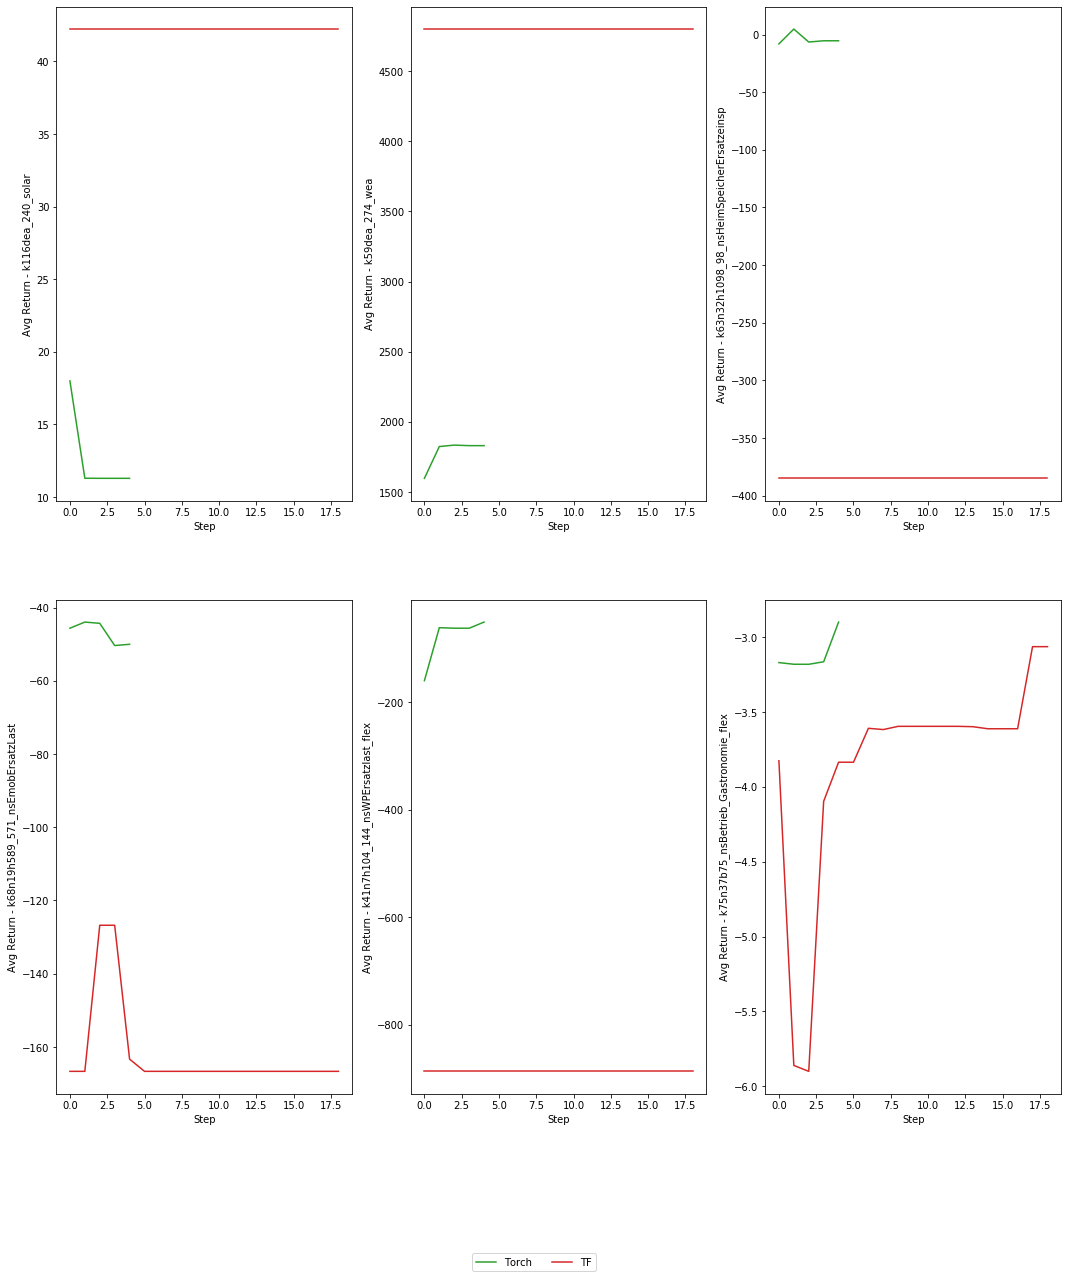

In [14]:
fig, axs = plt.subplots(2, 3)
i = 0
for j in range(2):
    for k in range(3):
        agent_returns_torch = [ret[i] for ret in returns_torch]
        agent_returns_tf = [ret[i] for ret in returns_tf]
        #min_length = len(agent_returns_tf)*(len(agent_returns_tf) < len(agent_returns_torch)) + \
        #                len(agent_returns_torch)*(len(agent_returns_tf) >= len(agent_returns_torch))
        axs[j, k].plot(agent_returns_torch, 'tab:green', label = "Torch")
        axs[j, k].plot(agent_returns_tf, 'tab:red', label = "TF")
        axs[j, k].set(ylabel='Avg Return - {}'.format(agentList[i]), xlabel='Step')
        i += 1
handles, labels = axs[j, k].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol = 2)
plt.savefig(path_torch + "RewardsV2.svg",  bbox_inches = 'tight', pad_inches = 0)

In [56]:
datapath_torch = os.path.join(path_tfagents, "Actorloss.pkl")
objects = readPickle(datapath_torch)
loss_torch = []
for obj in objects:
    loss_torch = loss_torch + obj
    
    
datapath_tf = os.path.join(path_tfagents, "Criticloss.pkl")
objects = readPickle(datapath_tf)
loss_tf = []
for obj in objects:
    loss_tf = loss_tf + obj

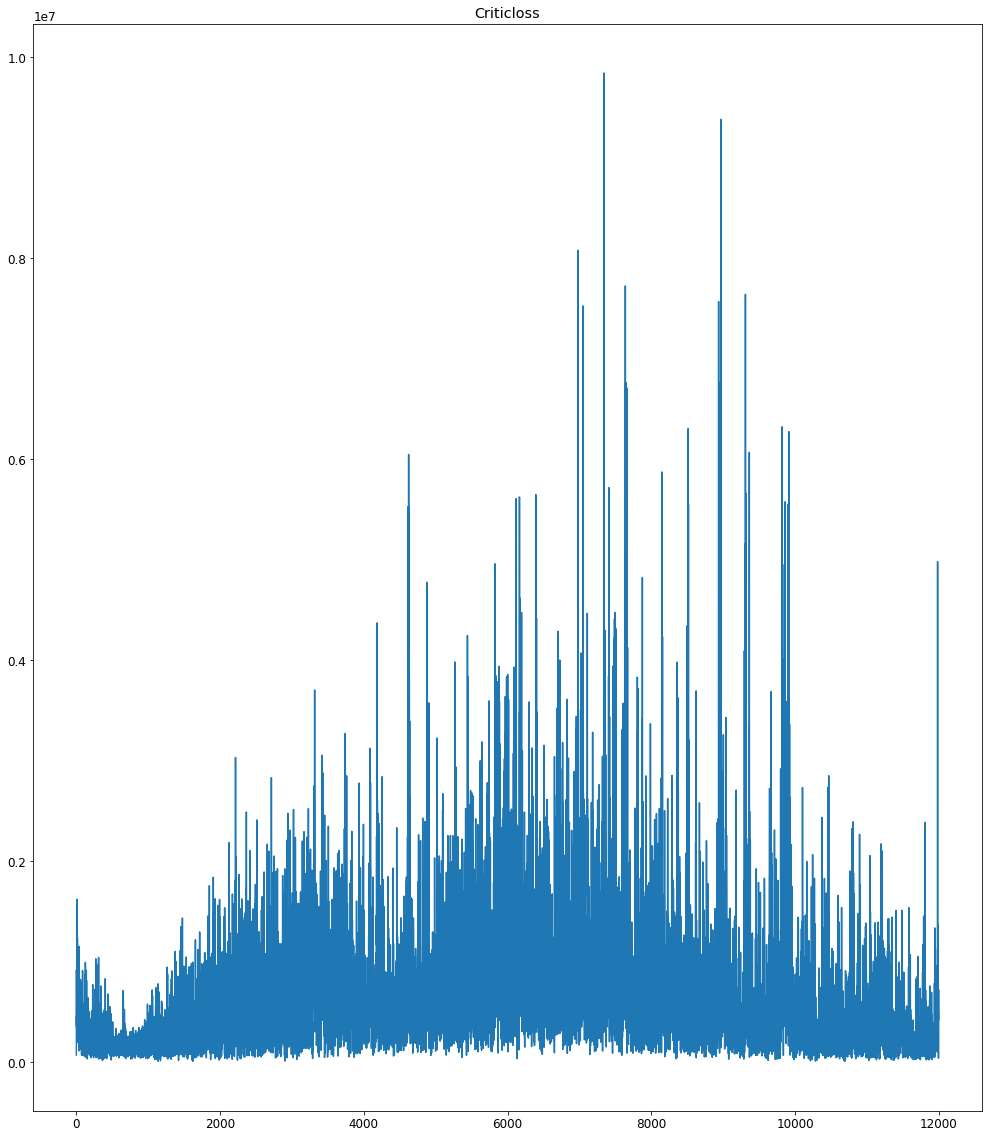

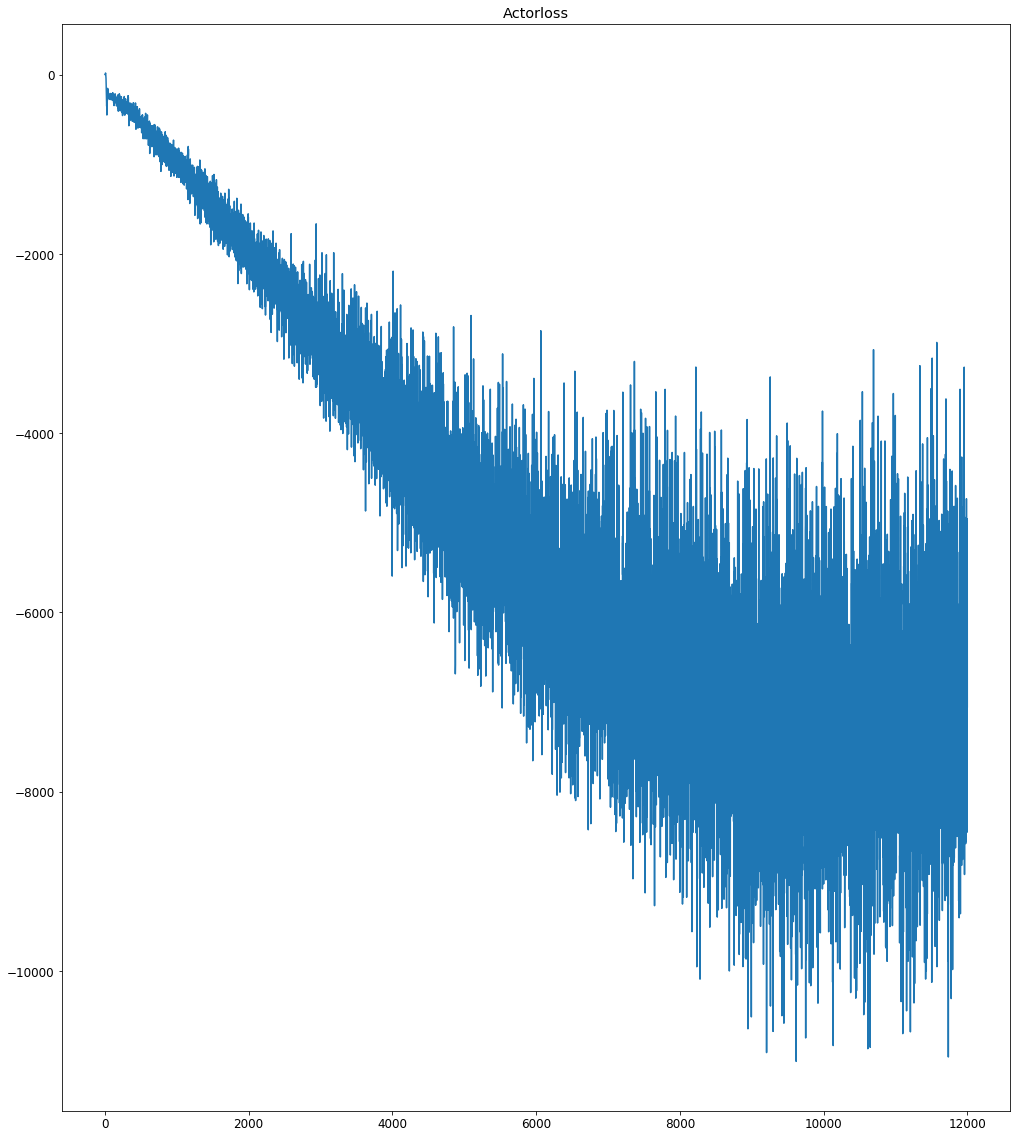

In [57]:
plt.plot(loss_tf, 'tab:blue', label = "Tensorflow")
plt.title("Criticloss")
plt.savefig(path_tfagents + "Criticloss.svg",  bbox_inches = 'tight', pad_inches = 0)

plt.show()
plt.plot(loss_torch, 'tab:blue', label = "Torch")
plt.title("Actorloss")
plt.savefig(path_tfagents + "Actorloss.svg",  bbox_inches = 'tight', pad_inches = 0)